In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit import rdBase
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.ML.Descriptors import MoleculeDescriptors
import pubchempy as pcp

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

RDKit WARNING: [12:48:18] Enabling RDKit 2019.09.2 jupyter extensions


In [7]:
print('rdkit version: ', rdBase.rdkitVersion)
print('pandas version: ', pd.__version__)

rdkit version:  2019.09.2
pandas version:  0.25.3


In [2]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m = Chem.MolFromMolFile('data/input.mol')
stringWithMolData=open('data/input.mol','r').read()
m = Chem.MolFromMolBlock(stringWithMolData)

In [4]:
m

In [7]:
m = Chem.MolFromMolFile('data/invalid.mol')
m is None

True

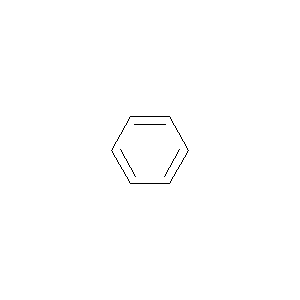

In [3]:
benzene = Chem.MolFromSmiles('C1=CC=CC=C1')
Draw.MolToImage(benzene)

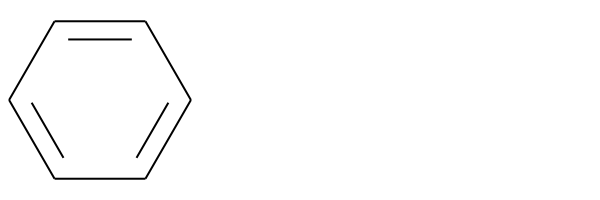

In [4]:
Draw.MolsToGridImage([benzene])

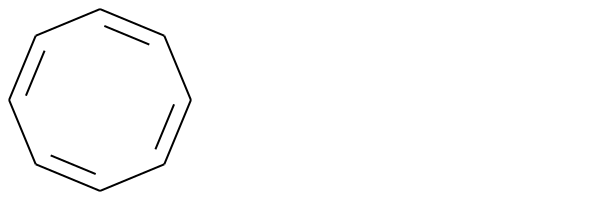

In [7]:
myoriginal = Chem.MolFromSmiles('C1=CC=CC=CC=C1')
Draw.MolsToGridImage([myoriginal])

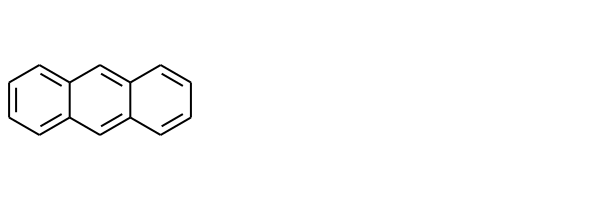

In [14]:
tmp = pcp.get_compounds('anthracene', 'name')[0]
anthracene = Chem.MolFromSmiles(tmp.isomeric_smiles)
Draw.MolsToGridImage([anthracene])

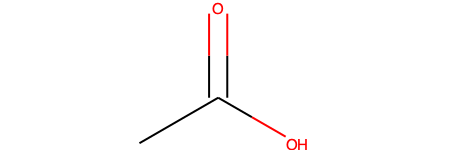

In [17]:
m1 = Chem.MolFromSmiles("CC(=O)O")
m1

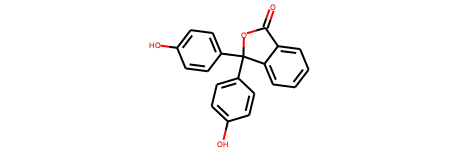

In [19]:
m2 = Chem.MolFromSmiles("O=C1OC(c2ccccc12)(c3ccc(O)cc3)c4ccc(O)cc4")
m2

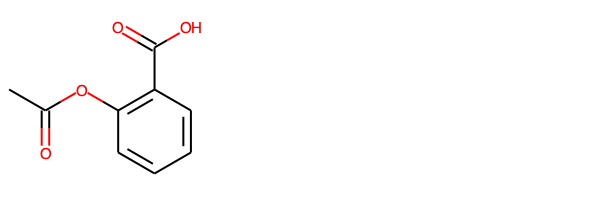

In [20]:
d1 = Chem.SDMolSupplier("sdf/Structure2D_CID_2244.sdf")
Draw.MolsToGridImage(d1)

In [22]:
# structural similarity between Acetic Acid and Formic Acid
c1 = Chem.MolFromSmiles('CC(=O)O')
c2 = Chem.MolFromSmarts('O=CO')

c1.GetSubstructMatches(c2)

((2, 1, 3),)

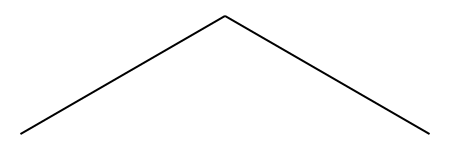

In [23]:
propane = Chem.MolFromSmiles('CCC')
propane

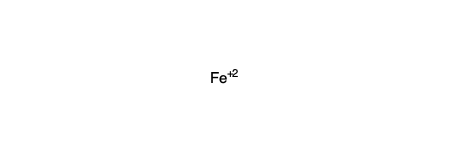

In [25]:
ironcation = Chem.MolFromSmiles('[Fe+2]')
ironcation

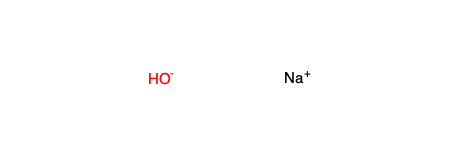

In [37]:
sodiumHydroxide = Chem.MolFromSmiles('[OH-].[Na+]')
sodiumHydroxide

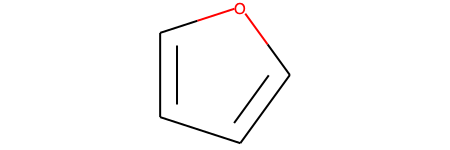

In [95]:
fran = Chem.MolFromSmiles('c1Occc1')
fran

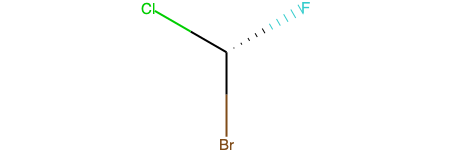

In [61]:
sbromoChloroFluoroMethane = Chem.MolFromSmiles('Br[C@H](Cl)F')
sbromoChloroFluoroMethane

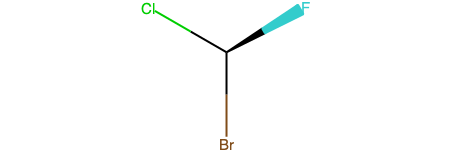

In [90]:
rbromoChloroFluoroMethane = Chem.MolFromSmiles('Br[C@@H](Cl)F')
rbromoChloroFluoroMethane

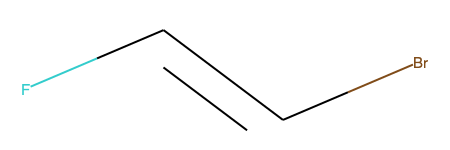

In [96]:
e1bromo2fluoroEthene = Chem.MolFromSmiles('F/C=C/Br')
e1bromo2fluoroEthene

In [132]:
m = Chem.MolFromMolFile('sdf/r-1-phenylEthanol.sdf')
Chem.MolToSmiles(m)

'C[C@@H](O)c1ccccc1'

In [130]:
m = Chem.MolFromMolFile('sdf/r-1-phenylEthanol.sdf')
Chem.MolToSmiles(m, isomericSmiles=False)

'CC(O)c1ccccc1'

In [137]:
Chem.Kekulize(m)
Chem.MolToSmiles(m, kekuleSmiles=True)

'C[C@@H](O)C1=CC=CC=C1'

In [10]:
m = Chem.MolFromSmiles('N1C=Cc2ccccc12')
m
# m.GetSubstructMatches(Chem.MolFromSmarts('c'))
#=> ((1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,))



((3,), (4,), (5,), (6,), (7,), (8,))

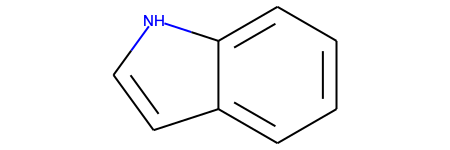

In [15]:
m2 = Chem.MolFromSmiles('N1C=Cc2ccccc12', sanitize=False)
Chem.SanitizeMol(m2, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL^Chem.SanitizeFlags.SANITIZE_KEKULIZE^Chem.SanitizeFlags.SANITIZE_SETAROMATICITY)
m2
# m2.GetSubstructMatches(Chem.MolFromSmarts('c'))
#=> ((3,), (4,), (5,), (6,), (7,), (8,))

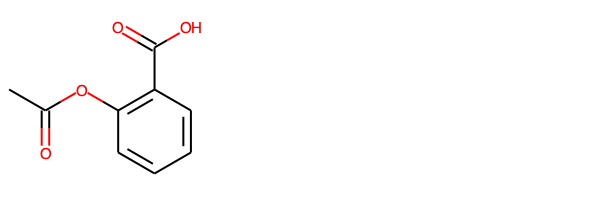

In [26]:
d1 = Chem.SDMolSupplier("sdf/Structure2D_CID_2244.sdf")
Draw.MolsToGridImage(d1)
# print(d1)

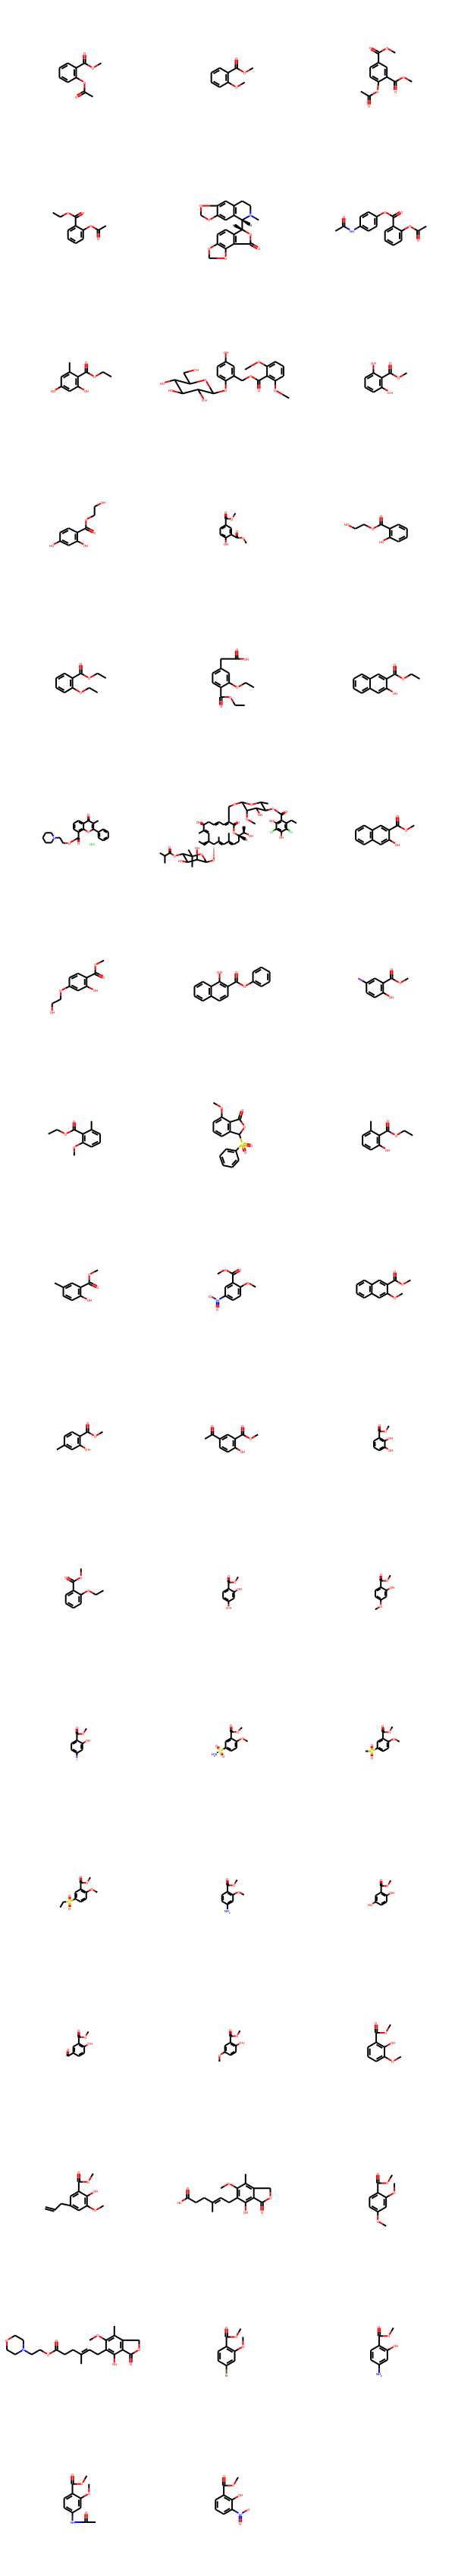

In [33]:
df_mol = Chem.SDMolSupplier("./sdf/methyl-salicylate.sdf", removeHs=False)
mols = [x for x in df_mol if x is not None]
Draw.MolsToGridImage(mols)

In [3]:
df = PandasTools.LoadSDF('./sdf/methyl-salicylate.sdf', removeHs=False)
df.MOLECULAR_WEIGHT = df.MOLECULAR_WEIGHT.astype(float)
# print(df.columns)
df['Fsp3'] = df.ROMol.map(Descriptors.FractionCSP3)
df['FP'] = df.apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x['ROMol'], 2, 2048), axis=1)
df['Tanimoto'] = DataStructs.BulkTanimotoSimilarity(df.FP[0], df.FP)
df[['CAS_NUMBER', 'MOLECULAR_WEIGHT', 'ROMol', 'Tanimoto', 'Fsp3']].head(3)

CSO2C = Chem.MolFromSmiles('CS(=O)(=O)C')
df[df.ROMol >= CSO2C][['CAS_NUMBER', 'ROMol', 'Tanimoto']]

,CAS_NUMBER,ROMol,Tanimoto
22,65131-09-1,"<img data-content=""rdkit/molecule"" src=""data:i...",0.215686
35,63484-12-8,"<img data-content=""rdkit/molecule"" src=""data:i...",0.365854
36,62140-67-4,"<img data-content=""rdkit/molecule"" src=""data:i...",0.348837


In [92]:
# df.apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x['ROMol'], 2, 2048), axis=1)

In [1]:
import urllib.request

url1 = 'https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf'
url2 = 'https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.train.sdf'

urllib.request.urlretrieve(url1, './sdf/solubility.test.sdf')
urllib.request.urlretrieve(url2, './sdf/solubility.train.sdf')

('./sdf/solubility.train.sdf', <http.client.HTTPMessage at 0x111790c50>)

In [4]:
def sdf_to_df(input_sdf):
    df_sdf = PandasTools.LoadSDF(input_sdf, molColName='Structure').set_index('NAME').drop(['ID', 'SOL_classification'], axis=1)
    names = df_sdf.index
    
    mols = [ mol for mol in Chem.SDMolSupplier(input_sdf)]
    descLists = [desc_name[0] for desc_name in Descriptors._descList]
    desc_calc = MoleculeDescriptors.MolecularDescriptorCalculator(descLists)
    data = [desc_calc.CalcDescriptors(mod) for mol in mols]
    df_desc = pd.DataFrame(data, columns=descLists, index=names)
    
    df = pd.concat([df_sdf, df_desc], axis=1)
    return df